In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets.fashion_mnist as fmnist
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import keras

In [75]:
(X_train, y_train), (X_test,  y_test) = fmnist.load_data()

In [76]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [64]:
print(f"Unique Classes for train set: {len(set(y_train))}")
print(f"Unique Classes for test set: {len(set(y_test))}")

Unique Classes for train set: 10
Unique Classes for test set: 10


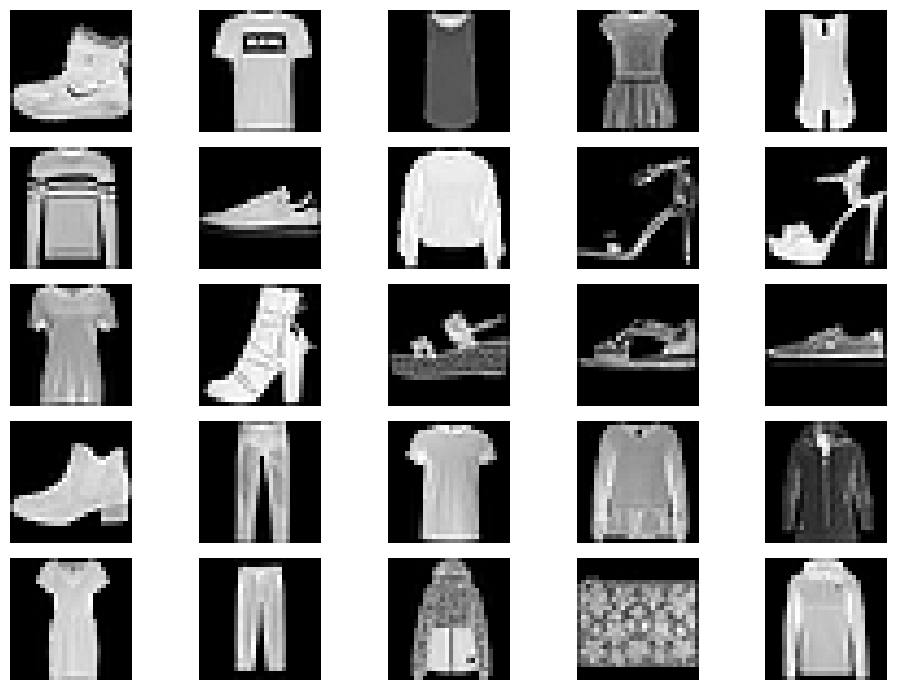

In [61]:
fig, axes = plt.subplots(5, 5, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(X_train[i], cmap = 'gray')
  ax.axis('off')
plt.tight_layout()
plt.show()

In [95]:
model = models.Sequential([
    keras.Input((28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [96]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
[layer1, layer2] = model.layers[1], model.layers[2]

In [105]:
print(layer1.weights)
print(layer2.weights)

[<Variable path=sequential_7/dense_25/kernel, shape=(784, 128), dtype=float32, value=[[-0.02217573 -0.01689378  0.01942008 ...  0.05926085 -0.01677901
   0.07884485]
 [ 0.06052028  0.07746658 -0.04770023 ... -0.06594922 -0.03096634
   0.06209139]
 [-0.03202697  0.05124445  0.06073253 ... -0.06241219  0.05865969
   0.0234869 ]
 ...
 [-0.05818657 -0.06161499 -0.04495904 ...  0.0520889   0.00668944
   0.06537848]
 [-0.02843745  0.05205067  0.00601366 ... -0.03441252 -0.0406468
  -0.06071299]
 [-0.00268659  0.05611733  0.08853298 ...  0.08807532  0.04967054
  -0.0148673 ]]>, <Variable path=sequential_7/dense_25/bias, shape=(128,), dtype=float32, value=[-0.04434403  0.0051078  -0.01256083 -0.00602156 -0.01750086  0.03823886
 -0.03447497  0.2585926  -0.04027123 -0.31575868  0.03487616 -0.02892006
 -0.01092113 -0.03929286 -0.02908104  0.18381318 -0.03061264 -0.02195801
 -0.48693314 -0.01488006  0.22546875 -0.02242512 -0.04667895 -0.0230091
 -0.01227374 -0.0302547  -0.03185061 -0.01212276  0.0

In [97]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)
fashion_mnist_model = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 11.9560 - sparse_categorical_accuracy: 0.6632 - val_loss: 0.8948 - val_sparse_categorical_accuracy: 0.6917
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.7888 - sparse_categorical_accuracy: 0.7258 - val_loss: 0.6504 - val_sparse_categorical_accuracy: 0.7667
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6196 - sparse_categorical_accuracy: 0.7805 - val_loss: 0.5462 - val_sparse_categorical_accuracy: 0.8129
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.5561 - sparse_categorical_accuracy: 0.8121 - val_loss: 0.5128 - val_sparse_categorical_accuracy: 0.8304
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5204 - sparse_categorical_accuracy: 0.8180 - val_loss: 0.5094 - val_sparse_categorical_accuracy: 0.8286
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5030 - sparse_categorical_accuracy: 0.8254 - val_loss: 0.5157 - val_sparse_categorical_accuracy

In [84]:
print(fashion_mnist_model.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


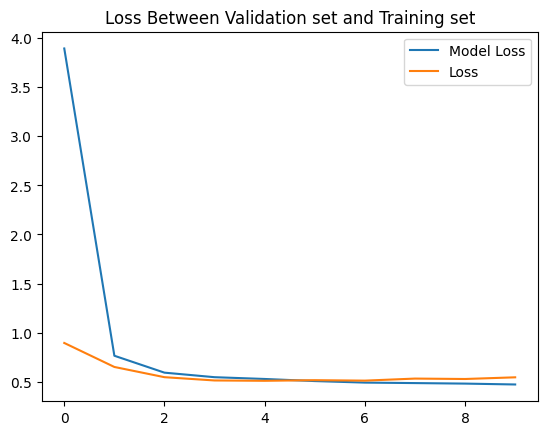

In [101]:
plt.title('Loss Between Validation set and Training set')
plt.plot(fashion_mnist_model.history['loss'], label = 'Model Loss')
plt.plot(fashion_mnist_model.history['val_loss'], label = 'Loss')
plt.legend()
plt.show()

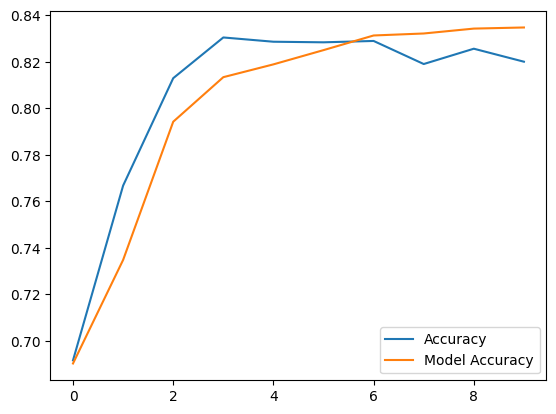

In [99]:
plt.plot(fashion_mnist_model.history['val_sparse_categorical_accuracy'], label = 'Accuracy')
plt.plot(fashion_mnist_model.history['sparse_categorical_accuracy'], label = 'Model Accuracy')
plt.legend()
plt.show()